#### Machine Learning projects checklist. There are eight main steps:

1. Frame the problem and look at the big picture.
2.  Get the data.
3.  Explore the data to gain insights.
4.  Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5.  Explore many different models and short-list the best ones.
6.  Fine-tune your models and combine them into a great solution.
7.  Present your solution.
8.  Launch, monitor, and maintain your system.
9.  Obviously, you should feel free to adapt this checklist to your needs.

#### Frame the problem and look at the big picture.

1.  Define the objective in business terms.
2.  How will your solution be used?
3.  What are the current solutions/workarounds (if any)?
4.  How should you frame this problem (supervised/unsupervised, online/offline, etc.)
5.  How should performance be measured?
6.  Is the performance measure aligned with the business objective?
7.  What would be the minimum performance needed to reach the business objective?
8.  What are comparable problems? Can you reuse experience or tools?
9.  Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you or others have made so far.
12. Verify assumptions if possible

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [3]:
# Common import 
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Fetch the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
import tarfile
import urllib.request

In [7]:
# Fetch the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    
fetch_housing_data()

In [8]:
import pandas as pd

In [9]:
# Loading data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Schritt 1: Daten erkunden

* Informationen über die Daten anzeigen und erste Analysen durchführen (z.B. info(), describe()).
Histogramme der Merkmale plotten, um deren Verteilung zu verstehen.

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

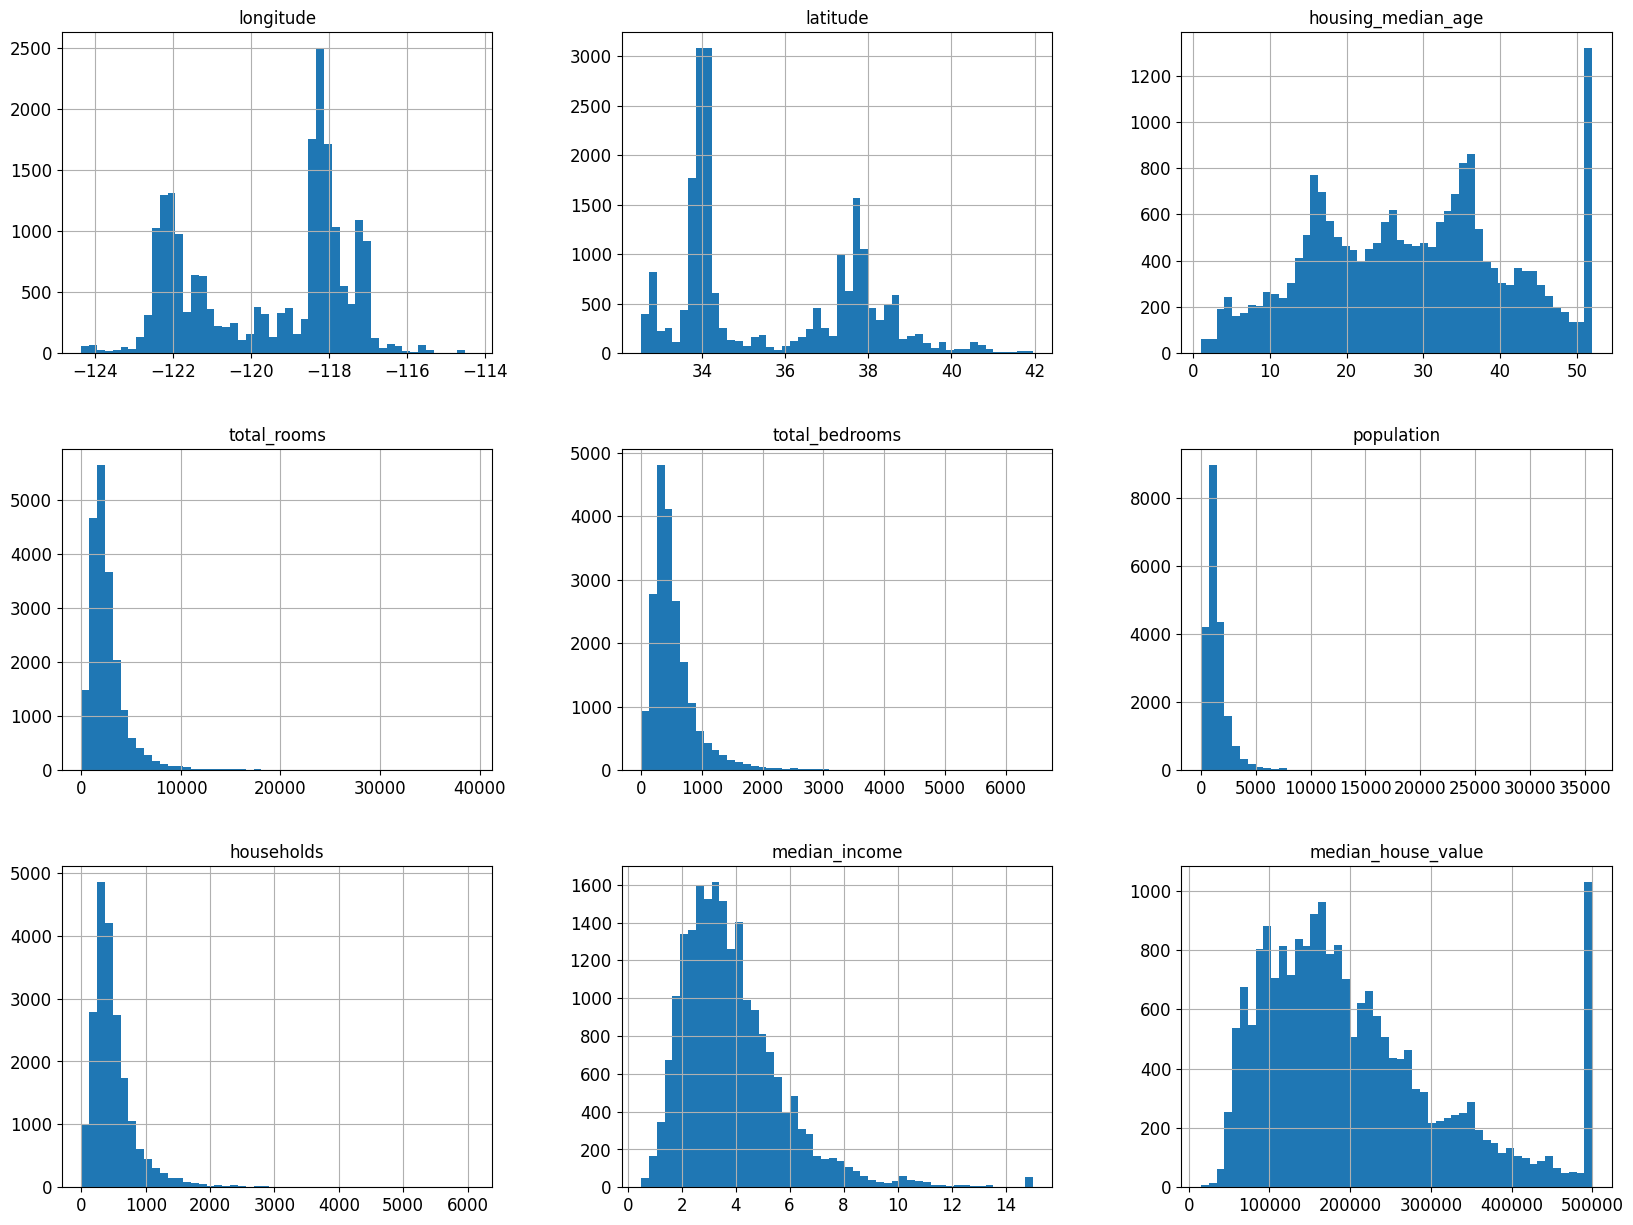

Saving figure attribute_histogram_plots


In [21]:
housing.hist(bins=50, figsize=(20,15))
plt.show()
save_fig("attribute_histogram_plots")

### Schritt 2: Daten in Trainings- und Testdaten aufteilen¶
* Die Daten werden stratifiziert nach Einkommenskategorien aufgeteilt, um sicherzustellen, dass die Einkommensverteilung im Trainings- und Testdatensatz gleich ist.

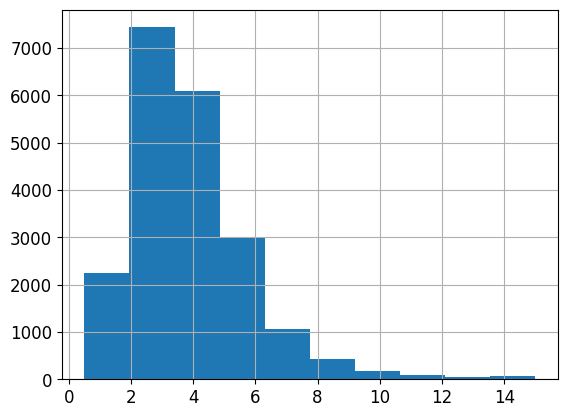

In [26]:
"""
Bei großen Datensätzen ist die Zufallsauswahl meistens in Ordnung.
Bei kleinen Datensätzen könnte es jedoch zu Verzerrungen (Bias) kommen. Das bedeutet, 
dass die Testdaten nicht repräsentativ für die gesamte Bevölkerung sein könnten.
Beispiel: Wenn man 1.000 Menschen anruft, um Fragen zu stellen, will man sicherstellen, 
dass diese 1.000 Menschen die gesamte Bevölkerung repräsentieren. Das nennt man eine stratifizierte Stichprobe.

Kategorie 1: Einkommen von 0 bis 1,5 (weniger als 15.000 USD)
Kategorie 2: Einkommen von 1,5 bis 3 (15.000 bis 30.000 USD)
Kategorie 3: Einkommen von 3 bis 4,5 (30.000 bis 45.000 USD)
Kategorie 4: Einkommen von 4,5 bis 6 (45.000 bis 60.000 USD)
Kategorie 5: Einkommen über 6 (mehr als 60.000 USD)
"""

housing["median_income"].hist()
plt.show()

In [41]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [48]:
# Daten in Trainings- und Testdaten aufteilen
from sklearn.model_selection import StratifiedShuffleSplit

In [49]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [50]:
# Entferne die Einkommenskategorie, da sie nur für die Stratifizierung benötigt wird
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

### Schritt 3: Kopiere die Trainingsdaten für die Untersuchung
* Eine Kopie des Trainingsdatensatzes wird erstellt, um Analysen durchzuführen.

In [51]:
# Schritt 3: Kopiere die Trainingsdaten für die Untersuchung
housing = strat_train_set.copy()

Saving figure better_visualization_plot


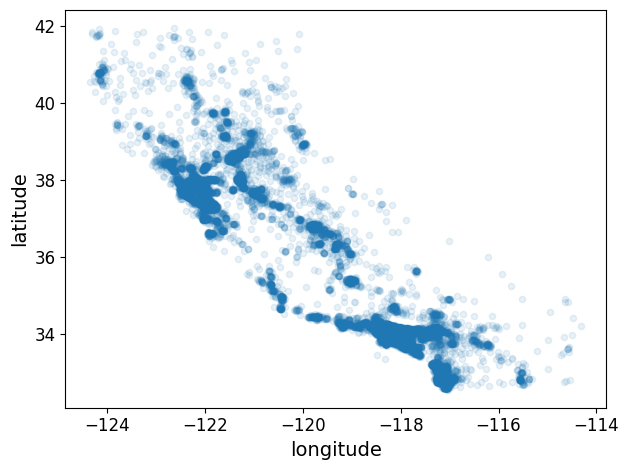

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")
plt.show()

### Schritt 4: Attribute kombinieren
* Neue Merkmale werden berechnet, z.B. Anzahl der Zimmer pro Haushalt.

In [53]:
# Schritt 4: Attribute kombinieren
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

### Schritt 5: Korrelationen analysieren
* Korrelationen zwischen den Merkmalen und dem Zielwert analysieren.

In [54]:
# Schritt 5: Korrelationen analysieren
# Der Korrelationskoeffizient liegt zwischen –1 und 1.
housing_numeric = housing.select_dtypes(include=[np.number])
corr_matrix = housing_numeric.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


<Figure size 640x480 with 0 Axes>

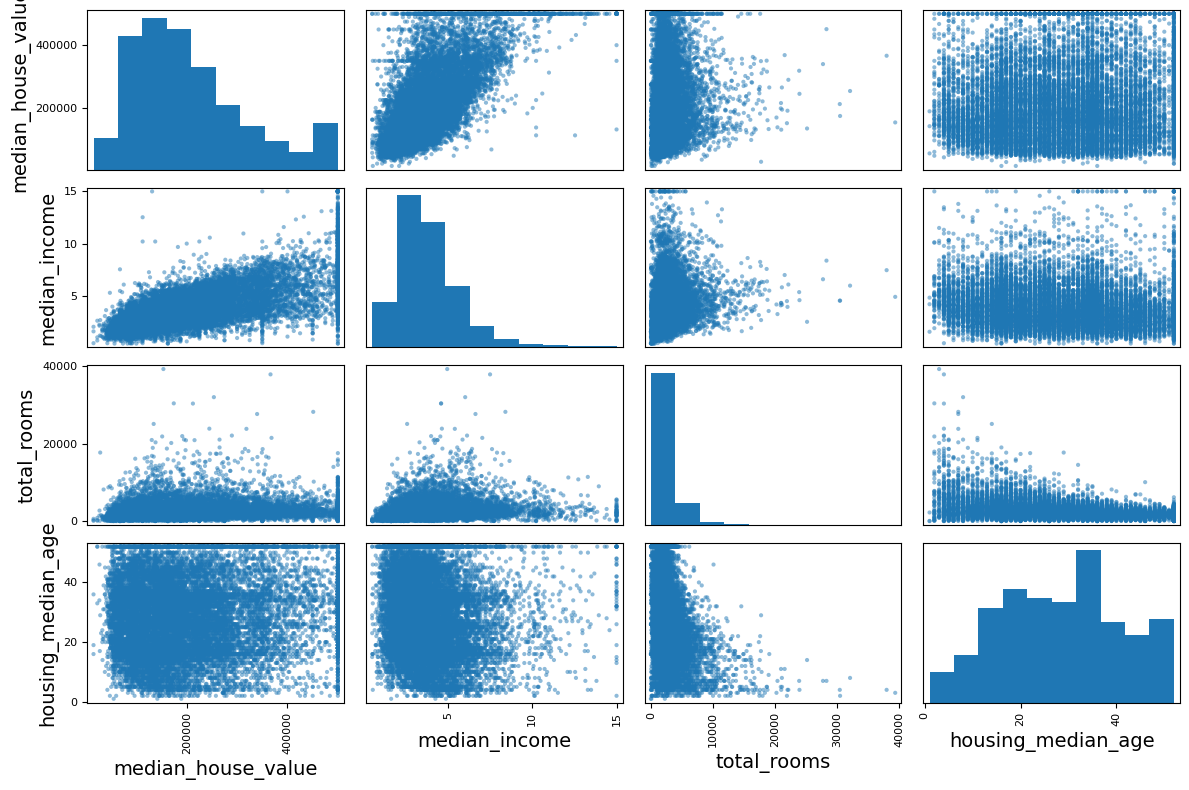

In [57]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")
plt.show()

Saving figure income_vs_house_value_scatterplot


<Figure size 640x480 with 0 Axes>

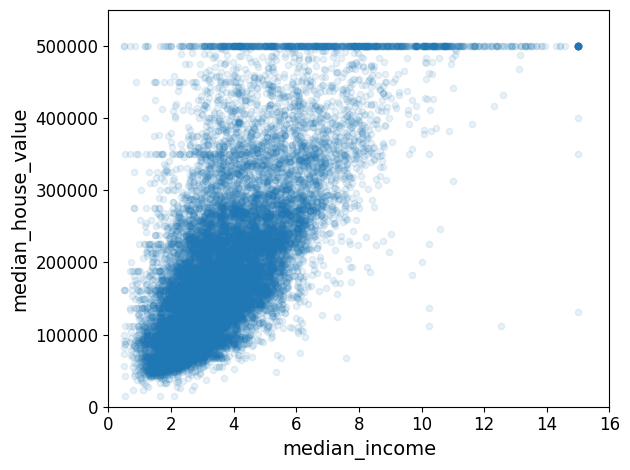

In [60]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")
plt.show()

### Schritt 6: Daten vorbereiten
* Merkmale und Zielwerte trennen.

In [61]:
# Schritt 6: Daten vorbereiten
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Schritt 7: Fehlende Werte korrigieren
* Fehlende Werte im Datensatz werden durch den Median ersetzt.

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
# Schritt 7: Fehlende Werte korrigieren


"""
Der imputer hat einfach den Median jedes Merkmals berechnet und das Ergebnis
im Attribut statistics_ gespeichert.
"""

"""
Sie können nun mit diesem »trainierten« imputer den Trainingsdatensatz transformieren, 
sodass die fehlenden Werte durch die gefundenen Mediane ersetzt werden:
"""


"""
Die Transformer von Scikit-Learn geben NumPy-Arrays aus (oder manchmal
Sparse-Matrizen von SciPy), auch wenn ihnen Pandas-DataFrames als Eingabe serviert werden.11 Daher ist die Ausgabe von imputer.transform(housing_num) ein
NumPy-Array: X hat weder Spaltennamen noch Index.
"""


imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [64]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


### Schritt 8: Kategorische Daten kodieren
* Kategorische Merkmale werden mit One-Hot-Encoding kodiert.

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Schritt 8: Kategorische Daten kodieren
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot_array = housing_cat_1hot.toarray()

In [67]:
housing_cat_1hot_array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Schritt 9: Transformationen anwenden
* Numerische Merkmale werden skaliert und transformiert (Log-Transformation, Verhältnisberechnungen).


In [68]:
# from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_tr)

In [71]:
# Log-Transformation und Verhältnisberechnungen
# Wir verwenden die Spaltennamen, anstatt die numerischen Indizes


# Funktion zur Berechnung des Verhältnisses
def column_ratio(X):
    return X[:, 0] / X[:, 1]


# Log-Transformation und Verhältnisberechnungen
housing_num_log = np.log1p(housing_tr[["total_rooms", "total_bedrooms", "population", "households", "median_income"]])
housing_bedrooms_ratio = column_ratio(housing_tr[["total_bedrooms", "total_rooms"]].values)
housing_rooms_per_house = column_ratio(housing_tr[["total_rooms", "households"]].values)
housing_people_per_house = column_ratio(housing_tr[["population", "households"]].values)

In [72]:
# Skalierung der transformierten Daten
scaler_log = StandardScaler()
scaler_bedrooms_ratio = StandardScaler()
scaler_rooms_per_house = StandardScaler()
scaler_people_per_house = StandardScaler()

In [73]:
# Skalierung der transformierten Daten
housing_num_scaled_log = scaler_log.fit_transform(housing_num_log)
housing_bedrooms_ratio_scaled = scaler_bedrooms_ratio.fit_transform(housing_bedrooms_ratio.reshape(-1, 1))
housing_rooms_per_house_scaled = scaler_rooms_per_house.fit_transform(housing_rooms_per_house.reshape(-1, 1))
housing_people_per_house_scaled = scaler_people_per_house.fit_transform(housing_people_per_house.reshape(-1, 1))


In [75]:
# Cluster-Ähnlichkeit


from sklearn.base import BaseEstimator, TransformerMixin


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

housing_geo = housing[["latitude", "longitude"]]
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
housing_geo_simil = cluster_simil.fit_transform(housing_geo, housing_labels)

### Schritt 10: Kombiniere alle vorbereiteten Merkmale
* Alle vorbereiteten numerischen und kategorischen Merkmale sowie die Clusterähnlichkeit werden kombiniert.

In [79]:
# Schritt 10: Kombiniere alle vorbereiteten Merkmale
housing_prepared = np.hstack([
    housing_num_scaled, 
    housing_num_scaled_log, 
    housing_bedrooms_ratio_scaled,
    housing_rooms_per_house_scaled,
    housing_people_per_house_scaled,
    housing_cat_1hot_array, 
    housing_geo_simil
])

In [80]:
housing_prepared

array([[-9.41350459e-01,  1.34743822e+00,  2.75635714e-02, ...,
         6.00439065e-05,  6.55107661e-17,  1.67485826e-01],
       [ 1.17178212e+00, -1.19243966e+00, -1.72201763e+00, ...,
         6.70749390e-44,  4.20713850e-01,  9.09277683e-18],
       [ 2.67581180e-01, -1.25971599e-01,  1.22045984e+00, ...,
         2.15462459e-22,  8.89178127e-03,  7.67398524e-06],
       ...,
       [-1.57079420e+00,  1.31001828e+00,  1.53856552e+00, ...,
         2.87510505e-03,  8.51866184e-22,  1.27701638e-01],
       [-1.56080303e+00,  1.24921090e+00, -1.16533270e+00, ...,
         1.53640782e-03,  3.28158591e-21,  1.76256200e-01],
       [-1.28105026e+00,  2.02567448e+00, -1.31489265e-01, ...,
         4.70933272e-02,  3.93270102e-26,  6.09882178e-04]])

### Schritt 11: Zielwerte transformieren
* Zielwerte werden skaliert.

In [81]:
# Schritt 11: Zielwerte transformieren
target_scaler = StandardScaler()
housing_labels_scaled = target_scaler.fit_transform(housing_labels.to_frame())
housing_labels_scaled

array([[-1.16601465],
       [ 0.62745084],
       [-1.07439665],
       ...,
       [-0.5756836 ],
       [ 0.44162188],
       [-1.2472608 ]])

### Schritt 12: Modelltraining
* Ein Random Forest Regressor wird trainiert.

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Schritt 12: Modelltraining
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels_scaled.ravel()) #Warum rave ?

RandomForestRegressor(random_state=42)

### Schritt 13: Vorhersagen und Berechnung des RMSE für den Trainingsdatensatz
* Das trainierte Modell wird auf den Trainingsdatensatz angewendet und der RMSE berechnet.

In [85]:
from sklearn.metrics import mean_squared_error

# Schritt 13: Vorhersagen und Berechnung des RMSE für den Trainingsdatensatz
housing_predictions = forest_reg.predict(housing_prepared)
housing_predictions = target_scaler.inverse_transform(housing_predictions.reshape(-1, 1))
train_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print(f"Random Forest RMSE (Train): {train_rmse}")

Random Forest RMSE (Train): 17367.671983915854


/opt/anaconda3/envs/dlenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Schritt 14: Vorbereitung der Testdaten
* Die gleichen Transformationen, die auf den Trainingsdatensatz angewendet wurden, werden auch auf den Testdatensatz angewendet.

In [86]:
# Funktion zur Berechnung des Verhältnisses
def column_ratio(X):
    return X[:, 0] / X[:, 1]

# Schritt 14: Vorbereitung der Testdaten
housing_num_test = strat_test_set.drop(["median_house_value", "ocean_proximity"], axis=1)
housing_num_test_imputed = imputer.transform(housing_num_test)

# Schritt 9: Transformationen anwenden für den Testdatensatz
housing_num_test_scaled = scaler.transform(housing_num_test_imputed)


# Log-Transformation und Verhältnisberechnungen
log_features_idx = [housing_num_test.columns.get_loc("total_rooms"), housing_num_test.columns.get_loc("total_bedrooms"), housing_num_test.columns.get_loc("population"), housing_num_test.columns.get_loc("households"), housing_num_test.columns.get_loc("median_income")]
housing_num_test_log = np.log1p(housing_num_test_imputed[:, log_features_idx])
housing_bedrooms_ratio_test = column_ratio(housing_num_test_imputed[:, [housing_num_test.columns.get_loc("total_bedrooms"), housing_num_test.columns.get_loc("total_rooms")]])
housing_rooms_per_house_test = column_ratio(housing_num_test_imputed[:, [housing_num_test.columns.get_loc("total_rooms"), housing_num_test.columns.get_loc("households")]])
housing_people_per_house_test = column_ratio(housing_num_test_imputed[:, [housing_num_test.columns.get_loc("population"), housing_num_test.columns.get_loc("households")]])

# Skalierung der transformierten Daten
housing_num_test_scaled_log = scaler_log.transform(housing_num_test_log)
housing_bedrooms_ratio_test_scaled = scaler_bedrooms_ratio.transform(housing_bedrooms_ratio_test.reshape(-1, 1))
housing_rooms_per_house_test_scaled = scaler_rooms_per_house.transform(housing_rooms_per_house_test.reshape(-1, 1))
housing_people_per_house_test_scaled = scaler_people_per_house.transform(housing_people_per_house_test.reshape(-1, 1))

# One-Hot-Encoding der kategorischen Merkmale
housing_cat_test = strat_test_set[["ocean_proximity"]]
housing_cat_1hot_test = cat_encoder.transform(housing_cat_test).toarray()

# Anwendung der Cluster-Ähnlichkeit
housing_geo_test = strat_test_set[["latitude", "longitude"]]
housing_geo_simil_test = cluster_simil.transform(housing_geo_test)


/opt/anaconda3/envs/dlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
# Kombinieren der vorbereiteten Merkmale für Testdaten
housing_prepared_test = np.hstack([
    housing_num_test_scaled, 
    housing_num_test_scaled_log, 
    housing_bedrooms_ratio_test_scaled,
    housing_rooms_per_house_test_scaled,
    housing_people_per_house_test_scaled,
    housing_cat_1hot_test, 
    housing_geo_simil_test
])

### Schritt 15: Vorhersagen und Berechnung des RMSE für den Testdatensatz
* Das trainierte Modell wird auf den Testdatensatz angewendet und der RMSE berechne

In [88]:
# Vorhersagen und Berechnung des RMSE für den Testdatensatz
test_predictions = forest_reg.predict(housing_prepared_test)
test_predictions = target_scaler.inverse_transform(test_predictions.reshape(-1, 1))
test_rmse = mean_squared_error(strat_test_set["median_house_value"], test_predictions, squared=False)
print(f"Random Forest RMSE (Test): {test_rmse}")

Random Forest RMSE (Test): 44966.57123214176


/opt/anaconda3/envs/dlenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
